sales forcasting of Wallmart data

In [ ]:
pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done




```
`# This is formatted as code`
```

# importing important libraries

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

import math
from datetime import datetime
from datetime import timedelta

from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno
palette = px.colors.qualitative.Safe



from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

FEATURE ENGINEERING AND EDA ON DATA SET

In [ ]:
df_store = pd.read_csv('stores.csv')

In [ ]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
df_features = pd.read_csv('features.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
df2 = df_test.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
df.drop(['IsHoliday_y'], axis=1,inplace=True)
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df2.drop(['IsHoliday_y'], axis=1,inplace=True)
df2.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df2.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [ ]:
df.shape

(35192, 16)

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,35192.000000,35192.000000,35192.000000,35192.000000,35192.000000,12575.000000,10214.000000,11917.000000,12405.000000,12575.000000,35192.000000,35192.000000,35192.000000
mean,2.288134,39.808110,19887.632768,67.996482,3.218714,7746.292991,3478.989044,1436.940081,3574.877890,4783.668759,202.691163,7.238487,145693.075131
std,1.053462,28.850512,27813.185679,14.807635,0.423974,8145.934386,10915.982324,9215.896519,6191.935933,4581.031862,32.741282,0.931983,67357.891230
min,1.000000,1.000000,-1098.000000,28.840000,2.514000,41.740000,-10.500000,0.040000,4.000000,135.160000,126.064000,3.879000,37392.000000
25%,1.000000,17.000000,2851.252500,57.060000,2.759000,3196.900000,35.740000,5.400000,570.570000,1940.770000,211.117671,6.891000,37392.000000
50%,2.000000,32.000000,8604.360000,69.420000,3.290000,6037.760000,160.940000,28.160000,1703.100000,3946.030000,214.984655,7.441000,151315.000000
75%,3.000000,59.000000,25681.087500,81.060000,3.594000,9873.330000,1629.260000,105.020000,4120.320000,6149.040000,220.265178,7.852000,202307.000000
max,4.000000,99.000000,318422.010000,93.340000,3.907000,75149.790000,92523.940000,83340.330000,48159.860000,36430.330000,226.987364,8.623000,205863.000000


In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]

In [ ]:
df.shape


(35139, 16)

In [ ]:
unvalues = {}
for col in df.columns:
    unvalues[col] = df[col].value_counts().shape[0]

pd.DataFrame(unvalues, index=['unique value count']).transpose()


,unique value count
Store,4
Dept,78
Date,143
Weekly_Sales,33969
IsHoliday,2
Temperature,547
Fuel_Price,248
MarkDown1,204
MarkDown2,162
MarkDown3,186


In [ ]:
df.duplicated().sum()

0

In [ ]:
msno.bar(df, color="dodgerblue")
plt.show()

In [ ]:
nullvaluecount = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
print(nullvaluecount)

In [ ]:
df = df.fillna(0)

In [ ]:
nullvaluecount = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
print(nullvaluecount)

In [ ]:
msno.bar(df, color="dodgerblue")
plt.show()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

In [ ]:
df['Date'].head(5)

In [ ]:
df['Date'].tail(5)

In [ ]:
df.plot(kind='box',layout=(3,6),figsize=(20,16))
plt.show()

In [ ]:
df.head()

In [ ]:
weekly_sales = df['Weekly_Sales'].groupby(df['month']).mean()
plt.figure(figsize=(25,8))
sns.barplot(x=weekly_sales.index,y= weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average sales for each month ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('month', fontsize=16)
plt.show()

In [ ]:

monthly_sales = df.groupby('month')['Weekly_Sales'].mean()
plt.figure(figsize=(25,8))
sns.barplot(x=monthly_sales.index,y= monthly_sales.values, palette='dark')
plt.grid()
plt.title('Average sales for each month ', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('month', fontsize=16)
plt.show()

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(7, 7), sharex=False)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(df.Weekly_Sales, color="b", ax=axes[0, 0])
sns.distplot(df.Temperature, color="r", ax=axes[0, 1])
sns.distplot(df.size, color="r", ax=axes[0, 2])

sns.distplot(df.Fuel_Price, color="g", ax=axes[1, 0])

sns.distplot(df.CPI, color="m", ax=axes[1, 1])
sns.distplot(df.week, color="m", ax=axes[1, 2])

sns.distplot(df.Unemployment, color="m", ax=axes[2, 0])
sns.distplot(df.year, color="m", ax=axes[2, 1])
sns.distplot(df.month, color="m", ax=axes[2, 2])


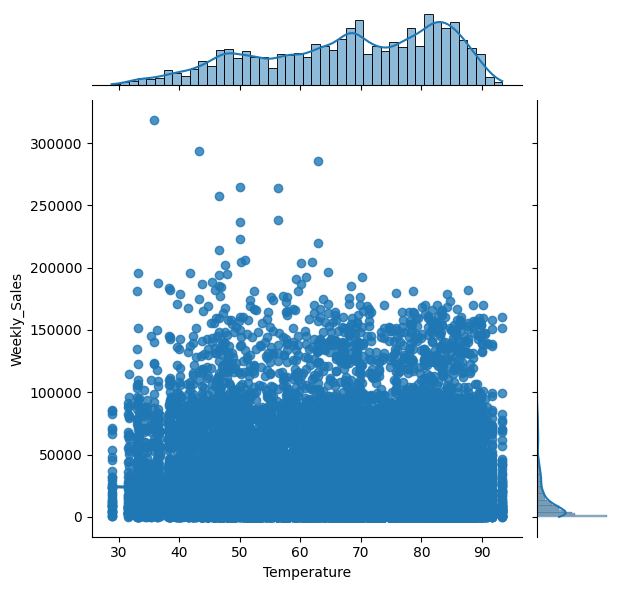

In [ ]:
sns.jointplot(x= "Temperature", y= "Weekly_Sales", data=df, kind='reg')

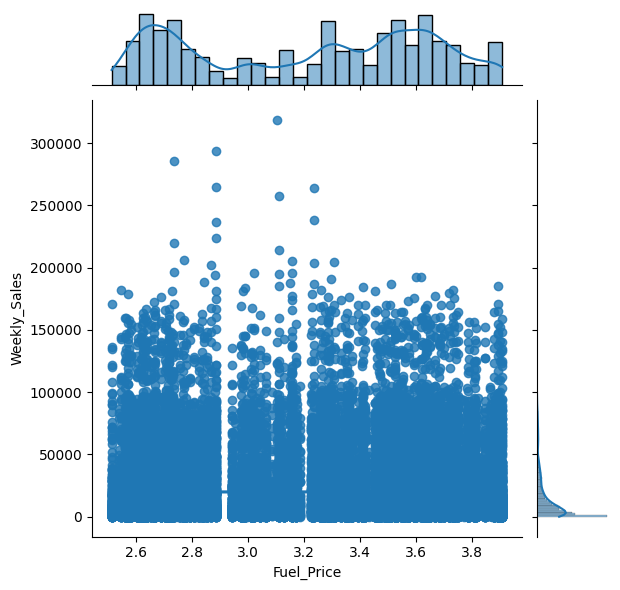

In [ ]:
sns.jointplot(x= "Fuel_Price", y= "Weekly_Sales", data=df, kind='reg')

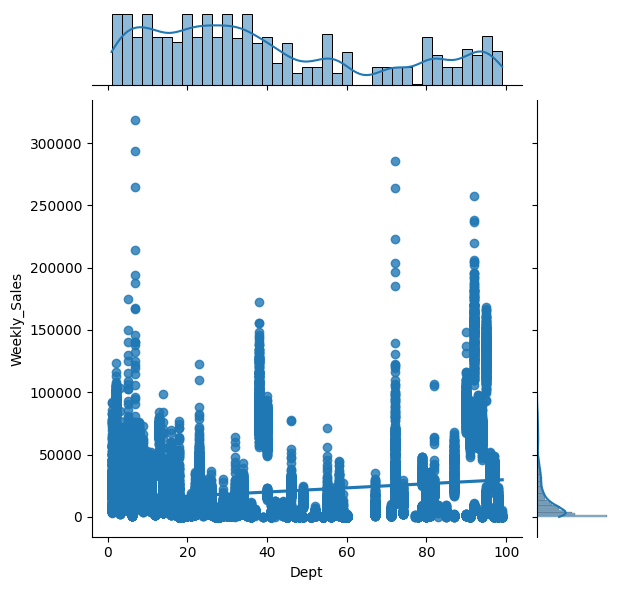

In [ ]:
sns.jointplot(x= "Dept", y= "Weekly_Sales", data=df, kind='reg')

In [ ]:
sns.jointplot(x= "Store", y= "Weekly_Sales", data=df, kind='reg')

In [ ]:
sns.jointplot(x= "Size", y= "Weekly_Sales", data=df, kind='reg')

In [ ]:
df.corr()

In [ ]:
sns.heatmap( df.corr(), annot=False );

In [ ]:
sizes= df.groupby('Size').mean()
fig=px.line(sizes, x = sizes.index, y = sizes.Weekly_Sales,
        title='The Relation between store size and sales',color_discrete_sequence=palette, template = 'plotly_dark')
fig.show()

IT SHOWS THAT THERE IS AN INCRESING SALES PATTERN IF WE INCRESE STORE SIZE

In [ ]:
monthly_sales = df.groupby('month')['Weekly_Sales'].mean()
monthly_sales.plot()

In [ ]:
df_new = df.copy()

In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}
df_new['Type'] = df_new['Type'].replace(type_group)

In [ ]:
df_new['IsHoliday'] = df_new['IsHoliday'].astype(bool).astype(int)

In [ ]:
df['Date'] = df['Date'].astype(str)


In [ ]:
df_new0=df_new.copy()

In [ ]:
sns.heatmap( df_new0.corr(), annot=False );

DUE TOLESS CORRELATION BETWEEN WEEKLY SALES AND  ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment','Date'] COLUMNS SO WE CAN DROP THEM TO GET A BETTER OUTPUT

In [ ]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment','Date']
df_new0.drop(drop_col, axis=1, inplace=True)

In [ ]:
df_new0.drop(['Date'], axis=1, inplace=True)

In [ ]:
sns.heatmap( df_new0.corr(), annot=False );

In [ ]:
df_new0

In [ ]:
X = df_new0.drop(columns=['Weekly_Sales'])


In [ ]:
X

In [ ]:
Y = df['Weekly_Sales']
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
ypred = model.predict(X_test)

from sklearn.metrics import r2_score
r2score = r2_score(y_test,ypred)
print("R2Score",r2score*100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of DecisionTreeRegressor with optional parameters
# You can specify hyperparameters like max_depth, min_samples_split, etc.
regressor = DecisionTreeRegressor()

# Fit the regressor to your training data
regressor.fit(X_train, y_train)

# Make predictions on a new dataset (e.g., X_test)
y_pred1 = regressor.predict(X_test)


In [ ]:


from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred1)
print("R2Score",r2score*100)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
regressor = LinearRegression()

# Fit the regressor to your training data
regressor.fit(X_train, y_train)

# Make predictions on a new dataset (e.g., X_test)
y_pred2 = regressor.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred2)
print("R2Score",r2score*100)

In [ ]:

from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingRegressor
logreg =RandomForestRegressor()

#defining KFold for cross validation
kfold = KFold(n_splits=10) ## 9 Train split, 1 validation split
num_est = 50

model = BaggingRegressor(base_estimator= logreg, n_estimators=num_est)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import precision_score


#nnUse it to fit and predict
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
print('Accuracy score for the test data is :', accuracy_score(y_test, y_pred_test))
print('Recall score for the test data is :', recall_score(y_test, y_pred_test))
print('Precision score for the test data is :', precision_score(y_test, y_pred_test))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
seed = 7
num_trees=500
kfold= KFold(n_splits=20)

model=AdaBoostRegressor( base_estimator= DecisionTreeRegressor(max_depth=1), n_estimators= num_trees)
results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print(results.mean())